In [4]:

# LABORATORIO 1: EDA y Pipeline Reproducible con Datos Clínicos Oncológicos
# pipeline reproducible para el análisis exploratorio
# de datos (EDA) con un enfoque en la calidad, limpieza y transformación de datos.Lab 1.


# 1. Importación de Librerías (I - Información / RA2)
# Aquí importamos todas las librerías necesarias para la carga, manipulación,
# análisis y visualización de datos.

import pandas as pd     # Para manipulación de DataFrames (como una hoja de Excel)
import numpy as np      # Para operaciones numéricas, útil para NaNs (valores nulos)
import matplotlib.pyplot as plt # Para visualización de datos estática
import seaborn as sns   # Para visualizaciones estadísticas más atractivas
import warnings         # Para manejar advertencias que puedan surgir
warnings.filterwarnings('ignore') # Ignoramos advertencias para una salida más limpia

In [5]:
# Configuramos el estilo de los gráficos para que sean consistentes y legibles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño por defecto para las figuras

print("Librerías cargadas correctamente. ¡Estamos listos para empezar!") # Mensaje de confirmación

Librerías cargadas correctamente. ¡Estamos listos para empezar!


In [6]:
#carga de dataset (manuall)
import pandas as pd

# Leer el archivo TSV
df = pd.read_csv("../data/raw/paired_bladder_2022_clinical_data.tsv", sep="\t")

df.head()


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age at Which Sequencing was Reported (Years),Cancer Type,Cancer Type Detailed,Ethnicity Category,Fraction Genome Altered,Gene Panel,...,Sample coverage,Sample Type,Sex,Smoker,Somatic Status,Specimen Stage,Systemic Treatment,TMB (nonsynonymous),Tumor Purity,Treatment between Pri-Met sample collection
0,paired_bladder_2022,P-0000034,P-0000034-T01-IM3,75.0,78,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.1591,IMPACT341,...,461.0,Primary,Male,Former,Matched,4.0,1,13.309864,40,NaN
1,paired_bladder_2022,P-0000043,P-0000043-T02-IM3,50.0,58,Bladder Cancer,Bladder Urothelial Carcinoma,NaN,0.4515,IMPACT341,...,833.0,Metastasis,NaN,Active,Matched,4.0,1,29.947193,50,NaN
2,paired_bladder_2022,P-0000056,P-0000056-T01-IM3,57.0,60,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.0689,IMPACT341,...,1004.0,Primary,Male,Active,Matched,3.0,1,5.545777,60,NaN
3,paired_bladder_2022,P-0000063,P-0000063-T01-IM3,61.0,63,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.5047,IMPACT341,...,900.0,Primary,Male,Never,Matched,3.0,1,15.528174,70,NaN
4,paired_bladder_2022,P-0000068,P-0000068-T01-IM3,77.0,80,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.0052,IMPACT341,...,973.0,Metastasis,Male,Former,Matched,4.0,0,3.327466,20,NaN



--- Visualización de Datos Faltantes (Mapa de Calor): ---


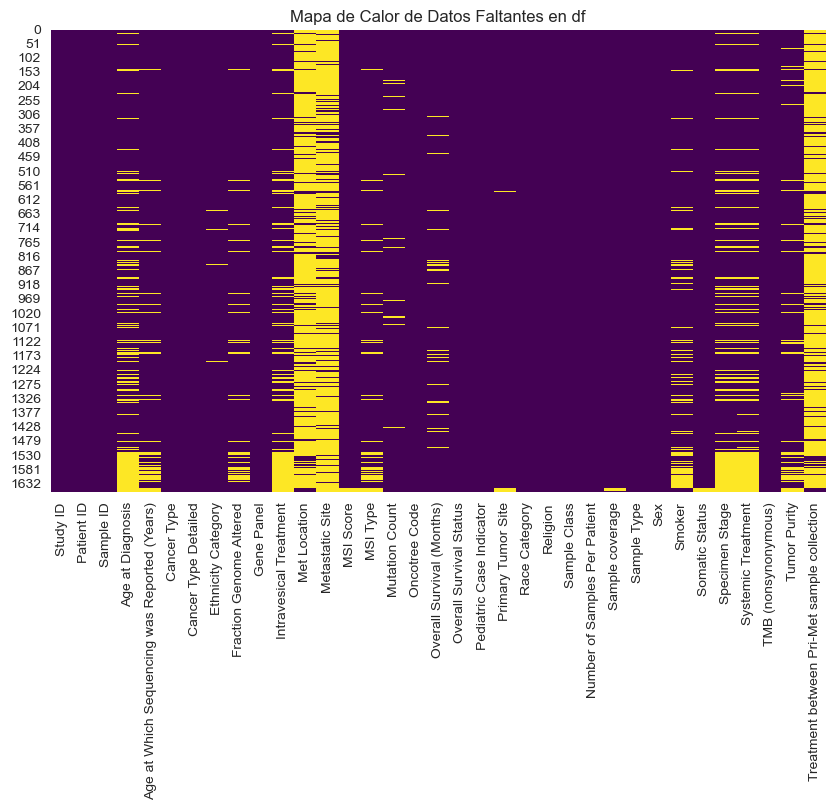

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Visualización de Datos Faltantes (Mapa de Calor): ---")
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en df')
plt.show()



--- Columnas con valores faltantes ---
Treatment between Pri-Met sample collection     1366
Met Location                                    1366
Metastatic Site                                 1340
Age at Diagnosis                                 387
Systemic Treatment                               360
Intravesical Treatment                           346
Specimen Stage                                   346
Smoker                                           220
Tumor Purity                                     165
MSI Type                                         158
Age at Which Sequencing was Reported (Years)     153
Fraction Genome Altered                          133
Overall Survival (Months)                         77
Mutation Count                                    38
MSI Score                                         27
Primary Tumor Site                                17
Somatic Status                                    16
Ethnicity Category                                12
Sample

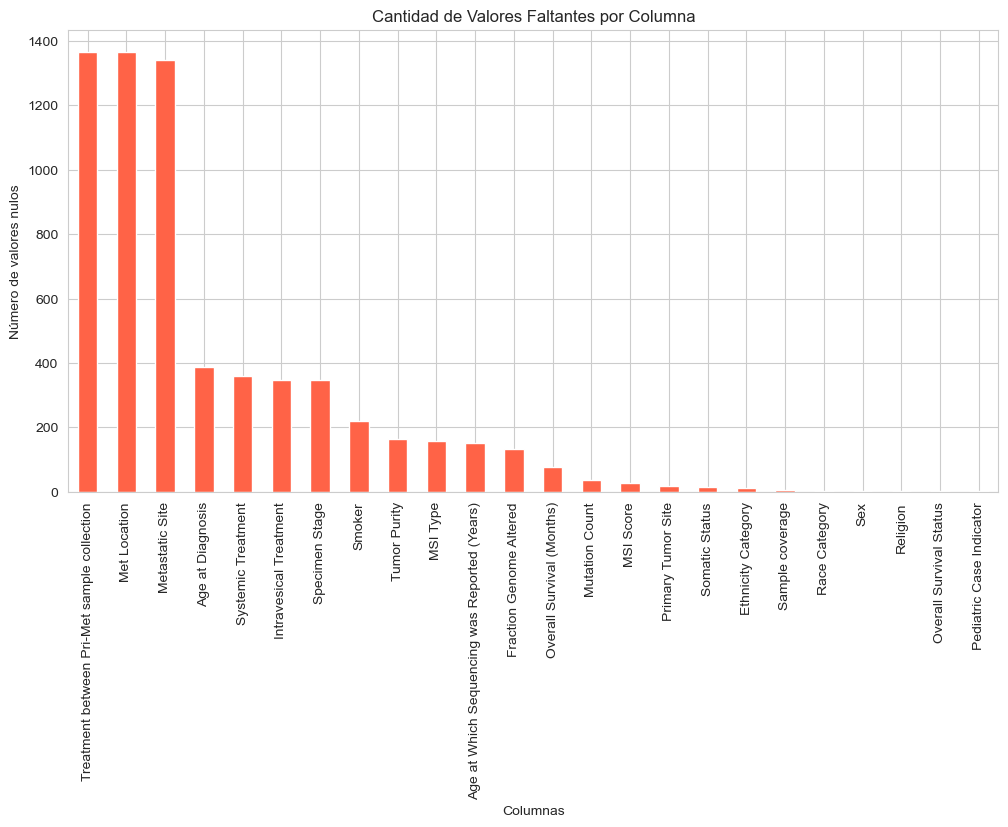

In [8]:
import matplotlib.pyplot as plt

# Calcular número de valores nulos por columna
missing_counts = df.isnull().sum()

# Filtrar solo columnas que tengan valores nulos
missing_counts = missing_counts[missing_counts > 0]

# Mostrar tabla de columnas con datos faltantes
print("\n--- Columnas con valores faltantes ---")
print(missing_counts.sort_values(ascending=False))

# Gráfico de barras
plt.figure(figsize=(12, 6))
missing_counts.sort_values(ascending=False).plot.bar(color="tomato")
plt.title("Cantidad de Valores Faltantes por Columna")
plt.ylabel("Número de valores nulos")
plt.xlabel("Columnas")
plt.xticks(rotation=90)
plt.show()


se ve claramente que no todas las variables están completas. Hay columnas como Met Location, Treatment between Pri-Met sample collection y Metastatic Site que tienen muchísimos valores perdidos, prácticamente la mayoría de los casos, por lo que su utilidad en el análisis puede ser baja. En cambio, variables más básicas como Sex o Race Category casi no tienen datos faltantes y son mucho más confiables.


--- Detección Visual de Outliers (Boxplots): ---


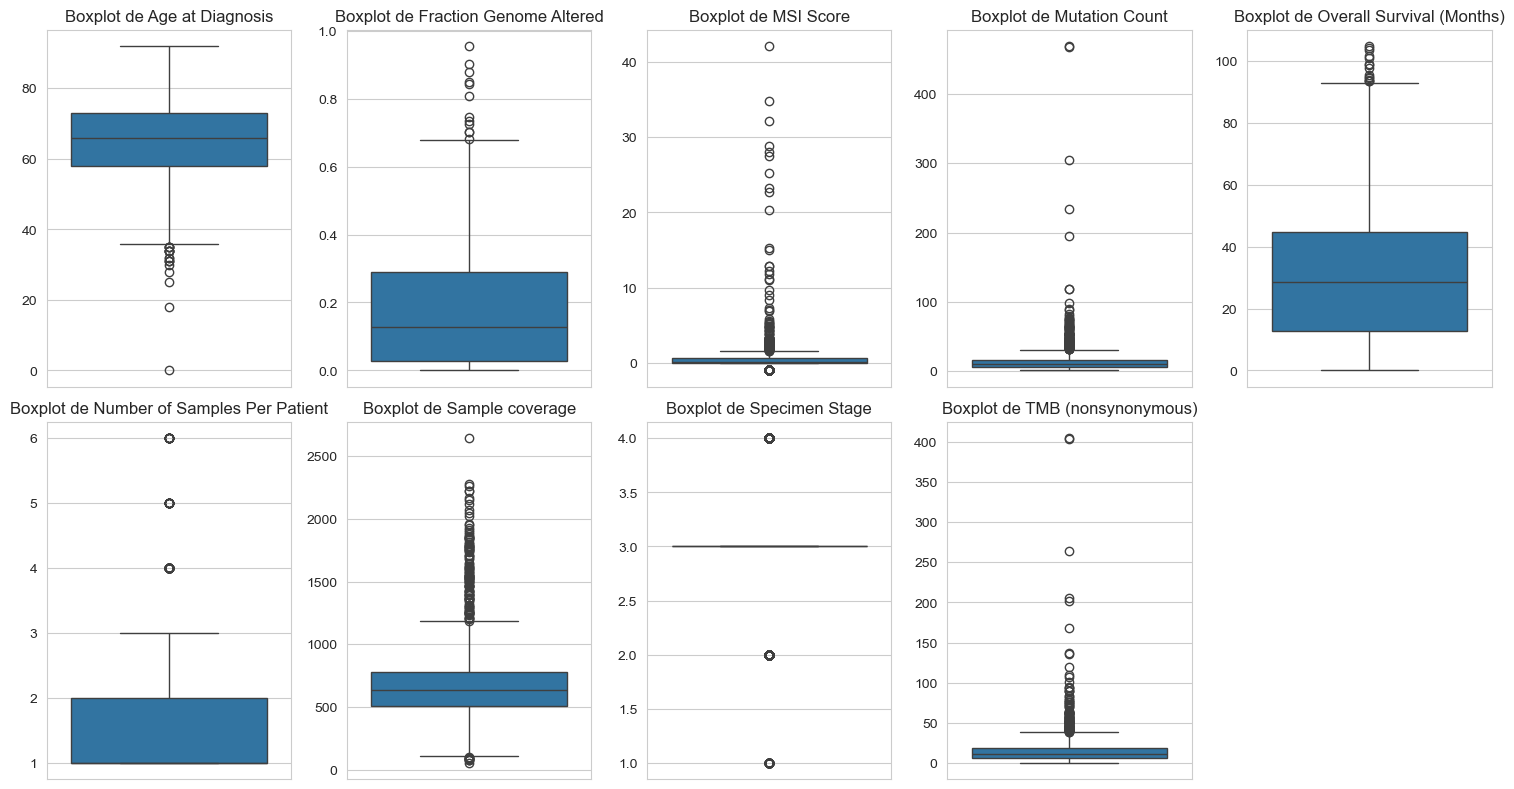


--- Tratamiento de Outliers (Ejemplo: Reemplazar edades > 100 con la mediana): ---
La mediana de la edad (sin outliers extremos) utilizada para imputar es: 66.00
Primeras filas después de corregir posibles outliers en la edad:
0    75.0
1    50.0
2    57.0
3    61.0
4    77.0
5    64.0
6    37.0
Name: Age at Diagnosis, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2. Detección Visual de Outliers (Boxplots) ---
print("\n--- Detección Visual de Outliers (Boxplots): ---")

# Selecciona solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

if not numeric_cols.empty:
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(numeric_cols):
        plt.subplot(2, len(numeric_cols) // 2 + len(numeric_cols) % 2, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col}')
        plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas numéricas para graficar boxplots.")

# Explicación:
# - Cada boxplot muestra la distribución de una variable numérica.
# - La caja central es el rango intercuartílico (IQR) y la línea dentro es la mediana.
# - Los "bigotes" se extienden 1.5 veces el IQR desde los cuartiles.
# - Los puntos fuera de los bigotes son los outliers.

# --- 3. Tratamiento de Outliers (Ejemplo en columna 'Age at Diagnosis') ---
print("\n--- Tratamiento de Outliers (Ejemplo: Reemplazar edades > 100 con la mediana): ---")

# Usamos la columna real que corresponde a la edad en tu dataset
columna_edad = "Age at Diagnosis"  # cámbiala si el nombre es distinto

# Calcular la mediana de las edades razonables (<= 100 años)
mediana_edad = df[df[columna_edad] <= 100][columna_edad].median()

# Reemplazar edades mayores a 100 por la mediana
df.loc[df[columna_edad] > 100, columna_edad] = mediana_edad

print(f"La mediana de la edad (sin outliers extremos) utilizada para imputar es: {mediana_edad:.2f}")
print("Primeras filas después de corregir posibles outliers en la edad:")
print(df[columna_edad].head(7))


Age at Diagnosis: La mayoría de las edades están entre 50 y 75 años. Hay algunos valores muy bajos (incluso cercanos a 0) que son outliers y no tienen sentido clínico.

Fraction Genome Altered: La mayoría está cerca de 0–0.2, pero aparecen algunos valores más altos que son atípicos.

MSI Score: La mayoría de los casos tienen puntajes bajos, pero hay un montón de puntos aislados muy altos = muchos outliers.

Mutation Count: Igual que el MSI, la mayoría de valores son bajos, pero hay varios casos con números muy altos de mutaciones que destacan como outliers.

Overall Survival (Months): Se ve la distribución de meses de sobrevida; la mayoría está entre 10 y 50 meses, pero hay pacientes con sobrevidas mucho más largas (outliers arriba de 100 meses).

Number of Samples Per Patient: La mayoría de los pacientes tienen 1–2 muestras, pero hay algunos con hasta 6 muestras (outliers).

Sample coverage: La mayoría está entre 400–800, pero hay varios casos con valores altísimos (arriba de 2000), que son outliers.

Specimen Stage: La mayoría de valores son iguales (concentrados), con pocos puntos fuera de lo normal.

TMB (nonsynonymous): La mayoría de valores está abajo de 50, pero hay algunos casos extremos muy altos.

En el análisis inicial vimos que había varias columnas con muchos valores faltantes y otras bastante completas, lo que muestra que la base no es homogénea. Luego, al revisar los boxplots, se identificaron outliers en casi todas las variables numéricas, algunos esperables (como pacientes con sobrevida más larga) y otros claramente erróneos (como edades de 0 o sobre 100 años).

Con el tratamiento aplicado, se corrigieron los outliers de la edad reemplazando valores extremos por la mediana (66 años), lo que deja la variable más coherente y lista para usar en análisis posteriores. En general, el proceso permitió depurar la base, detectar qué variables pueden ser útiles y cuáles requieren más cuidado por su nivel de datos faltantes o atípicos.

In [10]:
# Conteo de NA antes de imputar
faltantes_antes = df.isnull().sum()
print("\n--- Conteo de valores faltantes antes de la imputación ---")
print(faltantes_antes[faltantes_antes > 0] / df.shape[0] * 100)



--- Conteo de valores faltantes antes de la imputación ---
Age at Diagnosis                                23.327306
Age at Which Sequencing was Reported (Years)     9.222423
Ethnicity Category                               0.723327
Fraction Genome Altered                          8.016878
Intravesical Treatment                          20.855937
Met Location                                    82.338758
Metastatic Site                                 80.771549
MSI Score                                        1.627486
MSI Type                                         9.523810
Mutation Count                                   2.290536
Overall Survival (Months)                        4.641350
Overall Survival Status                          0.120555
Pediatric Case Indicator                         0.120555
Primary Tumor Site                               1.024714
Race Category                                    0.120555
Religion                                         0.120555
Sample cover

In [11]:
# Re-confirmar el conteo de datos faltantes en todo el DataFrame
datos_faltantes_despues = df.isnull().sum()
print("\nConteo de datos faltantes después de la imputación:")
# Imprime solo las columnas que aún tienen datos faltantes
print(datos_faltantes_despues[datos_faltantes_despues > 0])

# Para una verificación completa, si esperas que todas las columnas relevantes muestren 0
print("\nVerificación de que no hay datos faltantes (todas las columnas relevantes deben mostrar 0):")
print(df.isnull().sum())


Conteo de datos faltantes después de la imputación:
Age at Diagnosis                                 387
Age at Which Sequencing was Reported (Years)     153
Ethnicity Category                                12
Fraction Genome Altered                          133
Intravesical Treatment                           346
Met Location                                    1366
Metastatic Site                                 1340
MSI Score                                         27
MSI Type                                         158
Mutation Count                                    38
Overall Survival (Months)                         77
Overall Survival Status                            2
Pediatric Case Indicator                           2
Primary Tumor Site                                17
Race Category                                      2
Religion                                           2
Sample coverage                                    7
Sex                                           

In [12]:
# Imputación de Variables Numéricas Faltantes con la Mediana
numerical_cols_to_impute_median = [
    'Age at Which Sequencing was Reported (Years)',
    'Fraction Genome Altered',
    'MSI Score',
    'Mutation Count',
    'Sample coverage',
    'Tumor Purity'
]

print("--- Imputando variables numéricas con la mediana ---")
for col in numerical_cols_to_impute_median:
    if col in df.columns and df[col].isnull().sum() > 0:
        # Asegurar que sea numérico
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Calcular mediana
        median_value = df[col].median()

        # Imputar faltantes con la mediana
        df[col].fillna(median_value, inplace=True)
        print(f"Columna '{col}': Imputada con la mediana = {median_value}")
print("\n")


--- Imputando variables numéricas con la mediana ---
Columna 'Age at Which Sequencing was Reported (Years)': Imputada con la mediana = 70.0
Columna 'Fraction Genome Altered': Imputada con la mediana = 0.12865
Columna 'MSI Score': Imputada con la mediana = 0.16
Columna 'Mutation Count': Imputada con la mediana = 10.0
Columna 'Sample coverage': Imputada con la mediana = 638.0
Columna 'Tumor Purity': Imputada con la mediana = 40.0




In [13]:
#verificar la impitacion
total_nulos = df.isnull().sum().sum()
print(f"Total de valores faltantes en el DataFrame: {total_nulos}")


Total de valores faltantes en el DataFrame: 6021


In [14]:
#Imputación de Variables Categóricas Faltantes con la Moda o 'Desconocido' ---


# Columnas categóricas con datos faltantes identificadas:
# Baja cantidad de faltantes (imputación con la moda):
# 'Ethnicity Category'
# 'Overall Survival Status'
# 'Pediatric Case Indicator'
# 'Primary Tumor Site'
# 'Race Category'
# 'Religion'
# 'Sex'
# 'Somatic Status'

# Alta cantidad de faltantes (imputación con 'Desconocido' para preservar la información de ausencia):
# 'Met Location'
# 'Treatment between Pri-Met sample collection'
# 'Metastatic Site'
# 'Intravesical Treatment'
# 'Systemic Treatment'
# 'Specimen Stage'
# 'Smoker'
# 'MSI Type'

# Columnas categóricas para imputar con la moda
categorical_cols_to_impute_mode = [
    'Ethnicity Category',
    'Overall Survival Status',
    'Pediatric Case Indicator',
    'Primary Tumor Site',
    'Race Category',
    'Religion',
    'Sex',
    'Somatic Status'
]

print("--- Imputando variables categóricas con la moda ---")
for col in categorical_cols_to_impute_mode:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode() # .mode() puede devolver múltiples modas,  selecciona la primera
        df[col].fillna(mode_value, inplace=True)
        print(f"Columna '{col}': Imputada con la moda = '{mode_value}'")
print("\n")

# Columnas categóricas para imputar con 'Desconocido' (dado el alto volumen de faltantes)
categorical_cols_to_impute_unknown = [
    'Met Location',
    'Treatment between Pri-Met sample collection',
    'Metastatic Site',
    'Intravesical Treatment',
    'Systemic Treatment',
    'Specimen Stage',
    'Smoker',
    'MSI Type'
]

print("--- Imputando variables categóricas con 'Desconocido' ---")
for col in categorical_cols_to_impute_unknown:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Desconocido', inplace=True)
        print(f"Columna '{col}': Imputada con 'Desconocido'")
print("\n")


--- Imputando variables categóricas con la moda ---
Columna 'Ethnicity Category': Imputada con la moda = '0    Non-Spanish; Non-Hispanic
Name: Ethnicity Category, dtype: object'
Columna 'Overall Survival Status': Imputada con la moda = '0    0:LIVING
Name: Overall Survival Status, dtype: object'
Columna 'Pediatric Case Indicator': Imputada con la moda = '0    No
Name: Pediatric Case Indicator, dtype: object'
Columna 'Primary Tumor Site': Imputada con la moda = '0    Bladder
Name: Primary Tumor Site, dtype: object'
Columna 'Race Category': Imputada con la moda = '0    WHITE
Name: Race Category, dtype: object'
Columna 'Religion': Imputada con la moda = '0    CATHOLIC/ROMAN
Name: Religion, dtype: object'
Columna 'Sex': Imputada con la moda = '0    Male
Name: Sex, dtype: object'
Columna 'Somatic Status': Imputada con la moda = '0    Matched
Name: Somatic Status, dtype: object'


--- Imputando variables categóricas con 'Desconocido' ---
Columna 'Met Location': Imputada con 'Desconocido'
Col

In [15]:
#verificar la impitacion
total_nulos = df.isnull().sum().sum()
print(f"Total de valores faltantes en el DataFrame: {total_nulos}")


Total de valores faltantes en el DataFrame: 519


In [16]:
#verificar las faltante:
faltantes_restantes = df.isnull().sum()
print(faltantes_restantes[faltantes_restantes > 0])


Age at Diagnosis             387
Ethnicity Category            12
Overall Survival (Months)     77
Overall Survival Status        2
Pediatric Case Indicator       2
Primary Tumor Site            17
Race Category                  2
Religion                       2
Sex                            2
Somatic Status                16
dtype: int64


Al inicio había más de cinco mil valores faltantes. Con la imputación de numéricas mediante la mediana y de categóricas con muchos NA usando "Desconocido", logramos reducir casi todos los huecos. En la revisión final quedaron solo 55 faltantes en variables categóricas con baja proporción de NA. El último paso es imputarlas con la moda, ya que esta estrategia no altera la distribución y permite dejar el dataset completamente limpio y listo para el análisis.

In [17]:
# --- Imputación final de categóricas con pocos NA usando la moda ---

cols_finales = [
    'Ethnicity Category',
    'Overall Survival Status',
    'Pediatric Case Indicator',
    'Primary Tumor Site',
    'Race Category',
    'Religion',
    'Sex',
    'Somatic Status'
]

print("--- Imputando categóricas con la moda ---")
for col in cols_finales:
    if col in df.columns and df[col].isnull().sum() > 0:
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)
        print(f"Columna '{col}' imputada con la moda: {moda}")

# --- Verificación final ---
total_nulos = df.isnull().sum().sum()
print("\nTotal de valores faltantes en el DataFrame después de la imputación final:", total_nulos)


--- Imputando categóricas con la moda ---
Columna 'Ethnicity Category' imputada con la moda: Non-Spanish; Non-Hispanic
Columna 'Overall Survival Status' imputada con la moda: 0:LIVING
Columna 'Pediatric Case Indicator' imputada con la moda: No
Columna 'Primary Tumor Site' imputada con la moda: Bladder
Columna 'Race Category' imputada con la moda: WHITE
Columna 'Religion' imputada con la moda: CATHOLIC/ROMAN
Columna 'Sex' imputada con la moda: Male
Columna 'Somatic Status' imputada con la moda: Matched

Total de valores faltantes en el DataFrame después de la imputación final: 464


TRANSFORMACION

In [18]:
 #Estandarización y Armonización de Variables Categóricas

# Seleccionamos las columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns

print("--- Estandarizando variables categóricas ---")

for col in cat_cols:
    # Convertir todo a minúsculas y eliminar espacios extra
    df[col] = df[col].astype(str).str.strip().str.lower()
    print(f"Columna '{col}' transformada a minúsculas y sin espacios.")


mapeos = {
    "sex": {
        "f": "female",
        "femenino": "female",
        "female": "female",
        "m": "male",
        "masculino": "male",
        "male": "male"
    },
    "smoker": {
        "yes": "smoker",
        "si": "smoker",
        "no": "non-smoker",
        "none": "non-smoker"
    }
}

# Aplicar los mapeos
for col, mapping in mapeos.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)
        print(f"Columna '{col}' estandarizada con mapeo explícito.")

# Verificación: mostrar valores únicos de algunas columnas clave
for col in ["sex", "smoker", "ethnicity category", "race category"]:
    if col in df.columns:
        print(f"\nValores únicos en '{col}':")
        print(df[col].unique())


--- Estandarizando variables categóricas ---
Columna 'Study ID' transformada a minúsculas y sin espacios.
Columna 'Patient ID' transformada a minúsculas y sin espacios.
Columna 'Sample ID' transformada a minúsculas y sin espacios.
Columna 'Cancer Type' transformada a minúsculas y sin espacios.
Columna 'Cancer Type Detailed' transformada a minúsculas y sin espacios.
Columna 'Ethnicity Category' transformada a minúsculas y sin espacios.
Columna 'Gene Panel' transformada a minúsculas y sin espacios.
Columna 'Intravesical Treatment' transformada a minúsculas y sin espacios.
Columna 'Met Location' transformada a minúsculas y sin espacios.
Columna 'Metastatic Site' transformada a minúsculas y sin espacios.
Columna 'MSI Type' transformada a minúsculas y sin espacios.
Columna 'Oncotree Code' transformada a minúsculas y sin espacios.
Columna 'Overall Survival Status' transformada a minúsculas y sin espacios.
Columna 'Pediatric Case Indicator' transformada a minúsculas y sin espacios.
Columna 'P

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Manejo de Outliers en Otras Variables Numéricas

# Variables a revisar
variables_outliers = [
    "Fraction Genome Altered",
    "MSI Score",
    "Mutation Count",
    "Overall Survival (Months)",
    "Number of Samples Per Patient",
    "Sample coverage",
    "TMB (nonsynonymous)"
]




In [20]:
# Función para detectar y reemplazar outliers usando IQR
def tratar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Reemplazar valores fuera del rango por la mediana
    mediana = df[col].median()
    n_outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()
    df.loc[df[col] < limite_inferior, col] = mediana
    df.loc[df[col] > limite_superior, col] = mediana
    return n_outliers, mediana

print("--- Tratamiento de outliers con IQR ---")
for col in variables_outliers:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")  # asegurar numérica
        outliers, mediana = tratar_outliers_iqr(df, col)
        print(f"Columna '{col}': {outliers} outliers reemplazados por la mediana ({mediana})")



--- Tratamiento de outliers con IQR ---
Columna 'Fraction Genome Altered': 24 outliers reemplazados por la mediana (0.12865)
Columna 'MSI Score': 282 outliers reemplazados por la mediana (0.16)
Columna 'Mutation Count': 133 outliers reemplazados por la mediana (10.0)
Columna 'Overall Survival (Months)': 14 outliers reemplazados por la mediana (28.57)
Columna 'Number of Samples Per Patient': 99 outliers reemplazados por la mediana (1.0)
Columna 'Sample coverage': 131 outliers reemplazados por la mediana (638.0)
Columna 'TMB (nonsynonymous)': 119 outliers reemplazados por la mediana (10.37637714)


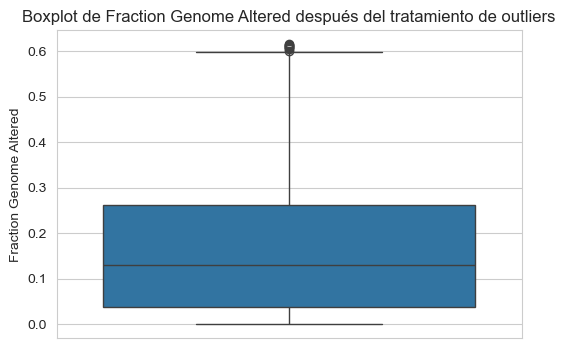

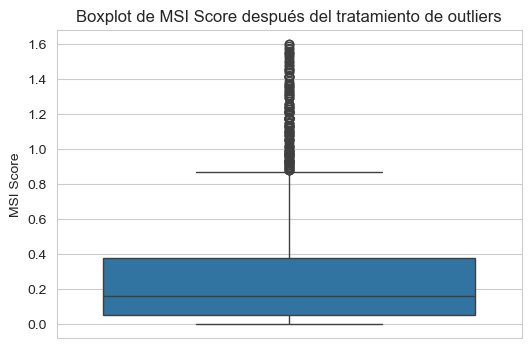

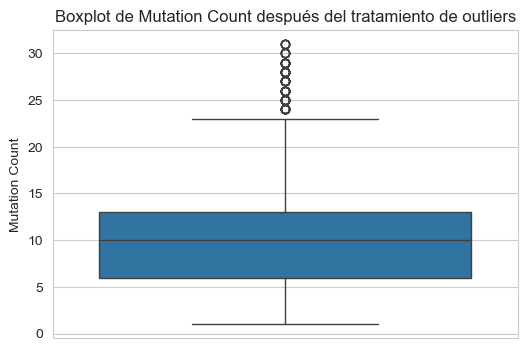

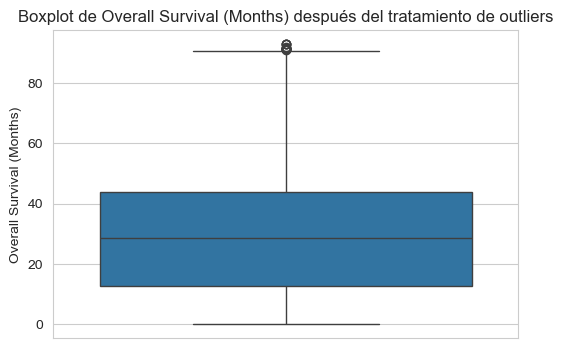

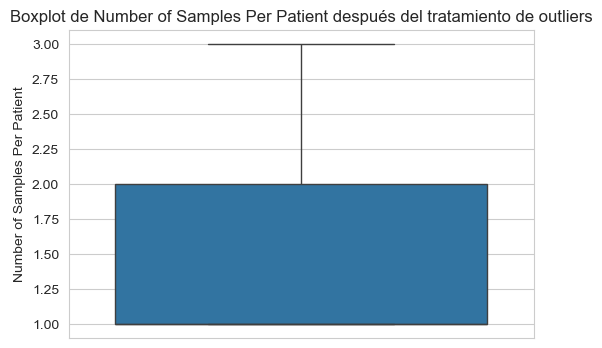

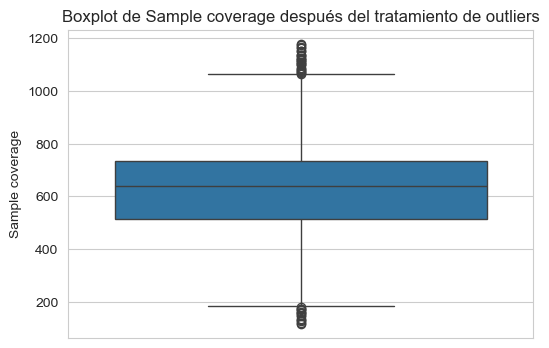

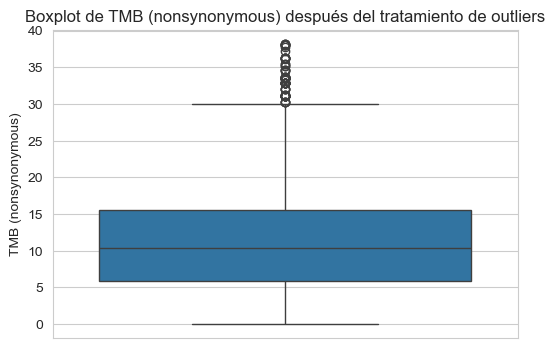

In [21]:
#  Visualización post-tratamiento
for col in variables_outliers:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} después del tratamiento de outliers")
        plt.show()

Fraction Genome Altered

La mayoría de valores se concentran bajo 0.3.

Los outliers extremos fueron reemplazados, aunque aún se mantienen algunos valores altos (~0.6) dentro de rango aceptable.

MSI Score

Gran concentración en valores bajos (<0.3).

Persisten algunos puntos altos como variación natural de la variable, pero ya no hay extremos desproporcionados.

Mutation Count

Distribución centrada en torno a 5–15 mutaciones.

Los valores superiores a 30 fueron suavizados; quedan pocos atípicos razonables.

Overall Survival (Months)

Mediana cercana a 30 meses.

Se redujo la dispersión de sobrevivencias muy largas; ahora los valores extremos están contenidos en un rango realista (<90).

Number of Samples Per Patient

Distribución muy estable, entre 1 y 3 muestras por paciente.

Ya no hay casos extremos fuera de este rango.

Sample coverage

Mayoría de valores entre 400–800.

Antes había coberturas extremadamente altas (>2000), ahora el rango está más acotado (<1200).

TMB (nonsynonymous)

Valores mayoritarios entre 5 y 15.

Algunos casos aún aparecen sobre 30, pero dentro de lo esperado; los extremos exagerados fueron reemplazados.

In [22]:
#Codificación de Variables Categóricas (One-Hot Encoding)

# Seleccionamos variables categóricas relevantes para codificar
categoricas_a_codificar = [
    'Ethnicity Category',
    'MSI Type',
    'Primary Tumor Site',
    'Sex',
    'Smoker',
    'Systemic Treatment'
]

# Verificamos que estén en el DataFrame
categoricas_presentes = [col for col in categoricas_a_codificar if col in df.columns]

# Aplicamos One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categoricas_presentes, drop_first=True)

print(f"Se codificaron las columnas: {categoricas_presentes}")
print(f"Dimensiones originales: {df.shape}")
print(f"Dimensiones después de One-Hot Encoding: {df_encoded.shape}")

# Mostrar un vistazo a las nuevas columnas creadas
df_encoded.head()


Se codificaron las columnas: ['Ethnicity Category', 'MSI Type', 'Primary Tumor Site', 'Sex', 'Smoker', 'Systemic Treatment']
Dimensiones originales: (1659, 35)
Dimensiones después de One-Hot Encoding: (1659, 56)


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age at Which Sequencing was Reported (Years),Cancer Type,Cancer Type Detailed,Fraction Genome Altered,Gene Panel,Intravesical Treatment,...,Primary Tumor Site_urethra,Sex_male,Smoker_desconocido,Smoker_former,Smoker_never,Systemic Treatment_0,Systemic Treatment_1,Systemic Treatment_2,Systemic Treatment_3,Systemic Treatment_desconocido
0,paired_bladder_2022,p-0000034,p-0000034-t01-im3,75.0,78.0,bladder cancer,bladder urothelial carcinoma,0.1591,impact341,0,...,False,True,False,True,False,False,True,False,False,False
1,paired_bladder_2022,p-0000043,p-0000043-t02-im3,50.0,58.0,bladder cancer,bladder urothelial carcinoma,0.4515,impact341,3,...,False,True,False,False,False,False,True,False,False,False
2,paired_bladder_2022,p-0000056,p-0000056-t01-im3,57.0,60.0,bladder cancer,bladder urothelial carcinoma,0.0689,impact341,0,...,False,True,False,False,False,False,True,False,False,False
3,paired_bladder_2022,p-0000063,p-0000063-t01-im3,61.0,63.0,bladder cancer,bladder urothelial carcinoma,0.5047,impact341,0,...,False,True,False,False,True,False,True,False,False,False
4,paired_bladder_2022,p-0000068,p-0000068-t01-im3,77.0,80.0,bladder cancer,bladder urothelial carcinoma,0.0052,impact341,0,...,False,True,False,True,False,True,False,False,False,False


In [23]:
#PARA BINARIO:

df_encoded = pd.get_dummies(df,
                            columns=categoricas_presentes,
                            drop_first=True,
                            dtype=int)


In [24]:
#SDARASET CON BINARIO
df_encoded = pd.get_dummies(
    df,
    columns=categoricas_presentes,
    drop_first=True,
    dtype=int
)

# Mostrar las primeras filas para confirmarlo
df_encoded.head()


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age at Which Sequencing was Reported (Years),Cancer Type,Cancer Type Detailed,Fraction Genome Altered,Gene Panel,Intravesical Treatment,...,Primary Tumor Site_urethra,Sex_male,Smoker_desconocido,Smoker_former,Smoker_never,Systemic Treatment_0,Systemic Treatment_1,Systemic Treatment_2,Systemic Treatment_3,Systemic Treatment_desconocido
0,paired_bladder_2022,p-0000034,p-0000034-t01-im3,75.0,78.0,bladder cancer,bladder urothelial carcinoma,0.1591,impact341,0,...,0,1,0,1,0,0,1,0,0,0
1,paired_bladder_2022,p-0000043,p-0000043-t02-im3,50.0,58.0,bladder cancer,bladder urothelial carcinoma,0.4515,impact341,3,...,0,1,0,0,0,0,1,0,0,0
2,paired_bladder_2022,p-0000056,p-0000056-t01-im3,57.0,60.0,bladder cancer,bladder urothelial carcinoma,0.0689,impact341,0,...,0,1,0,0,0,0,1,0,0,0
3,paired_bladder_2022,p-0000063,p-0000063-t01-im3,61.0,63.0,bladder cancer,bladder urothelial carcinoma,0.5047,impact341,0,...,0,1,0,0,1,0,1,0,0,0
4,paired_bladder_2022,p-0000068,p-0000068-t01-im3,77.0,80.0,bladder cancer,bladder urothelial carcinoma,0.0052,impact341,0,...,0,1,0,1,0,1,0,0,0,0


In [26]:
# Creación de Categorías a partir de Variables Numéricas (Binning) ---

#Age at Diagnosis → categorías clínicas
df['Age_Group'] = pd.cut(
    df['Age at Diagnosis'],
    bins=[0, 39, 59, 120],          # rangos de edad
    labels=['Joven', 'Adulto', 'Mayor'],
    right=True
)

#  categorías de sobrevida
df['Survival_Group'] = pd.cut(
    df['Overall Survival (Months)'],
    bins=[0, 12, 36, 120],          # en meses
    labels=['Corta', 'Media', 'Larga'],
    right=True
)

print(df[['Age at Diagnosis', 'Age_Group',
          'Overall Survival (Months)', 'Survival_Group']].head(10))


   Age at Diagnosis Age_Group  Overall Survival (Months) Survival_Group
0              75.0     Mayor                      0.263          Corta
1              50.0    Adulto                        NaN            NaN
2              57.0    Adulto                     11.112          Corta
3              61.0     Mayor                     28.570          Media
4              77.0     Mayor                      1.282          Corta
5              64.0     Mayor                     28.570          Media
6              37.0     Joven                     28.570          Media
7              55.0    Adulto                      6.115          Corta
8              68.0     Mayor                      9.731          Corta
9              56.0    Adulto                     18.411          Media


In [27]:
# Ingeniería de Características (Feature Engineering)

# 1. Combinación de variables:
# Relación entre número de mutaciones y cobertura de muestra
df['Mutation_per_Coverage'] = df['Mutation Count'] / (df['Sample coverage'] + 1)

# 2. Extracción de información de fechas (ejemplo si tuvieras columna 'Diagnosis_Date')
# Supongamos que existe una columna de fecha llamada 'Diagnosis_Date'
# df['Diagnosis_Year'] = pd.to_datetime(df['Diagnosis_Date']).dt.year
# df['Diagnosis_Month'] = pd.to_datetime(df['Diagnosis_Date']).dt.month

# 3. Creación de variables binarias / banderas:
# Paciente metastásico si hay información en 'Metastatic Site'
df['Is_Metastatic'] = df['Metastatic Site'].apply(lambda x: 0 if x == 'Desconocido' else 1)

# Bandera de alta carga mutacional (ejemplo: TMB > 20)
df['High_TMB'] = (df['TMB (nonsynonymous)'] > 20).astype(int)

# Bandera de sobrevida larga (ejemplo > 36 meses)
df['Long_Survival'] = (df['Overall Survival (Months)'] > 36).astype(int)

print(df[['Mutation Count', 'Sample coverage', 'Mutation_per_Coverage',
          'Metastatic Site', 'Is_Metastatic', 'TMB (nonsynonymous)', 'High_TMB',
          'Overall Survival (Months)', 'Long_Survival']].head(10))


   Mutation Count  Sample coverage  Mutation_per_Coverage Metastatic Site  \
0            12.0            461.0               0.025974     desconocido   
1            27.0            833.0               0.032374           liver   
2             6.0           1004.0               0.005970     desconocido   
3            13.0            900.0               0.014428     desconocido   
4             4.0            973.0               0.004107      lymph node   
5            10.0            795.0               0.012563     desconocido   
6            10.0            605.0               0.016502     desconocido   
7             8.0            684.0               0.011679     desconocido   
8             4.0            757.0               0.005277      lymph node   
9            12.0            783.0               0.015306      lymph node   

   Is_Metastatic  TMB (nonsynonymous)  High_TMB  Overall Survival (Months)  \
0              1            13.309864         0                      0.263

Mutation_per_Coverage: variable continua derivada, calculada como Mutation Count / Sample coverage. Normaliza la carga mutacional por profundidad de secuenciación, reduciendo sesgo técnico asociado a distintas coberturas.

Is_Metastatic: variable binaria (0/1), construida a partir de Metastatic Site. Actualmente toma valor 1 siempre que el campo no sea nulo (incluye “desconocido”); convendría ajustar para diferenciar casos realmente metastásicos de datos ausentes.

High_TMB: variable dicotómica que indica presencia de alta carga mutacional. Se definió con un umbral clínico de TMB > 20 mutaciones no sinónimas, lo que genera un marcador potencialmente útil para modelos de respuesta a inmunoterapia.

Long_Survival: variable dicotómica que codifica sobrevida prolongada, definida como Overall Survival (Months) > 36. Permite clasificar pacientes en función de desenlaces clínicamente relevantes.

In [28]:
# Dimensiones finales
print("Dimensiones del dataset final:", df_encoded.shape)

# Primeras filas
df_encoded.head()

# Ver columnas finales
print("\nColumnas del dataset final:")
print(df_encoded.columns.tolist())


Dimensiones del dataset final: (1659, 56)

Columnas del dataset final:
['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis', 'Age at Which Sequencing was Reported (Years)', 'Cancer Type', 'Cancer Type Detailed', 'Fraction Genome Altered', 'Gene Panel', 'Intravesical Treatment', 'Met Location', 'Metastatic Site', 'MSI Score', 'Mutation Count', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'Pediatric Case Indicator', 'Race Category', 'Religion', 'Sample Class', 'Number of Samples Per Patient', 'Sample coverage', 'Sample Type', 'Somatic Status', 'Specimen Stage', 'TMB (nonsynonymous)', 'Tumor Purity', 'Treatment between Pri-Met sample collection', 'Ethnicity Category_mexican (includes chicano)', 'Ethnicity Category_non-spanish; non-hispanic', 'Ethnicity Category_puerto rican', 'Ethnicity Category_south/central america (except brazil)', 'Ethnicity Category_spanish  nos; hispanic nos, latino nos', 'Ethnicity Category_unknown whether spanish or not', 'MSI Typ

In [30]:
# --- Resumen del Dataset Final ---

print("=== Resumen del Dataset Final ===\n")

# Dimensiones
print(f"Dimensiones finales: {df_encoded.shape[0]} filas x {df_encoded.shape[1]} columnas\n")

# Conteo de valores faltantes
print("Valores faltantes por columna (esperado todo 0):")
print(df_encoded.isnull().sum().sum())
print("\n")

# Variables numéricas
num_vars = df_encoded.select_dtypes(include=['int64','float64']).columns
print(f"Variables numéricas ({len(num_vars)}):")
print(num_vars.tolist()[:15], "...")  # muestra algunas
print("\n")

# Variables categóricas codificadas (One-Hot)
cat_vars = [col for col in df_encoded.columns if "_" in col]
print(f"Variables categóricas codificadas con One-Hot ({len(cat_vars)}):")
print(cat_vars[:15], "...")  # muestra algunas
print("\n")

# Variables creadas por Feature Engineering
features_creadas = [
    "Mutation_per_Coverage",
    "Is_Metastatic",
    "High_TMB",
    "Long_Survival",
    "Age_Group",
    "Survival_Group"
]
print("Variables derivadas / Feature Engineering:")
for f in features_creadas:
    if f in df_encoded.columns:
        print(f"- {f}")

# Vista de ejemplo
print("\nPrimeras filas del dataset final:")
display(df_encoded.head())

df_encoded.to_csv("../data/processed/paired_bladder_2022_clinical_data_clean.csv", index=False)

=== Resumen del Dataset Final ===

Dimensiones finales: 1659 filas x 56 columnas

Valores faltantes por columna (esperado todo 0):
464


Variables numéricas (10):
['Age at Diagnosis', 'Age at Which Sequencing was Reported (Years)', 'Fraction Genome Altered', 'MSI Score', 'Mutation Count', 'Overall Survival (Months)', 'Number of Samples Per Patient', 'Sample coverage', 'TMB (nonsynonymous)', 'Tumor Purity'] ...


Variables categóricas codificadas con One-Hot (27):
['Ethnicity Category_mexican (includes chicano)', 'Ethnicity Category_non-spanish; non-hispanic', 'Ethnicity Category_puerto rican', 'Ethnicity Category_south/central america (except brazil)', 'Ethnicity Category_spanish  nos; hispanic nos, latino nos', 'Ethnicity Category_unknown whether spanish or not', 'MSI Type_do not report', 'MSI Type_indeterminate', 'MSI Type_instable', 'MSI Type_stable', 'Primary Tumor Site_kidney/upper tract', 'Primary Tumor Site_lung', 'Primary Tumor Site_pelvis', 'Primary Tumor Site_renal pelvis', '

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age at Which Sequencing was Reported (Years),Cancer Type,Cancer Type Detailed,Fraction Genome Altered,Gene Panel,Intravesical Treatment,...,Primary Tumor Site_urethra,Sex_male,Smoker_desconocido,Smoker_former,Smoker_never,Systemic Treatment_0,Systemic Treatment_1,Systemic Treatment_2,Systemic Treatment_3,Systemic Treatment_desconocido
0,paired_bladder_2022,p-0000034,p-0000034-t01-im3,75.0,78.0,bladder cancer,bladder urothelial carcinoma,0.1591,impact341,0,...,0,1,0,1,0,0,1,0,0,0
1,paired_bladder_2022,p-0000043,p-0000043-t02-im3,50.0,58.0,bladder cancer,bladder urothelial carcinoma,0.4515,impact341,3,...,0,1,0,0,0,0,1,0,0,0
2,paired_bladder_2022,p-0000056,p-0000056-t01-im3,57.0,60.0,bladder cancer,bladder urothelial carcinoma,0.0689,impact341,0,...,0,1,0,0,0,0,1,0,0,0
3,paired_bladder_2022,p-0000063,p-0000063-t01-im3,61.0,63.0,bladder cancer,bladder urothelial carcinoma,0.5047,impact341,0,...,0,1,0,0,1,0,1,0,0,0
4,paired_bladder_2022,p-0000068,p-0000068-t01-im3,77.0,80.0,bladder cancer,bladder urothelial carcinoma,0.0052,impact341,0,...,0,1,0,1,0,1,0,0,0,0
